In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
pd.set_option('display.max_rows', 2000)
pd.set_option('display.max_columns', 500)
import matplotlib.pyplot as plt

In [2]:
 data = pd.read_csv(r'C:/Users/Aspandiyar/Desktop/KPMG/Sales20182020.csv', delimiter = ",")

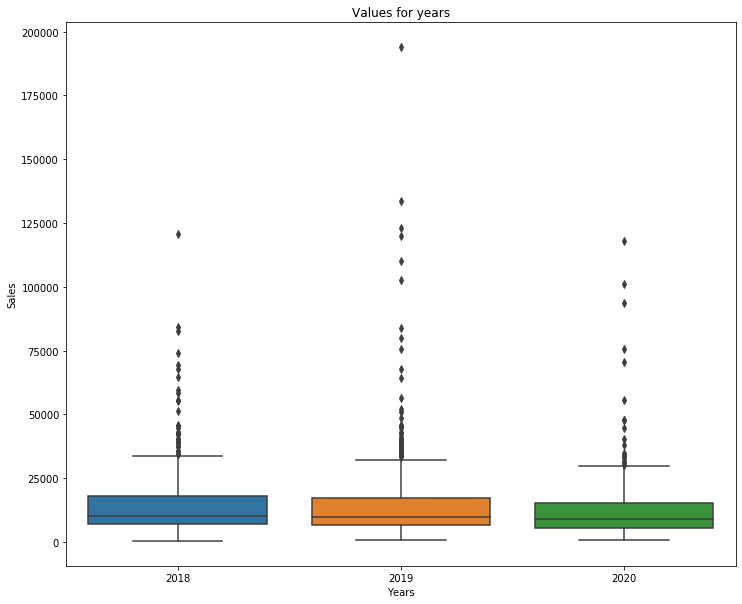

In [3]:
import seaborn as sns
reindexed_data = data.copy()
reindexed_data.Month = reindexed_data.Month.astype('datetime64[ns]')
reindexed_data = reindexed_data.set_index("Month")

plt.close()
#It is sometimes good to make sure the canvas prior is rendered and plot is closed.

fig, ax = plt.subplots(figsize=(12,10))
sns.boxplot(reindexed_data.index.year, reindexed_data["Sales"], ax=ax)#, width=20)
plt.title("Values for years")
plt.xlabel("Years")
plt.show()

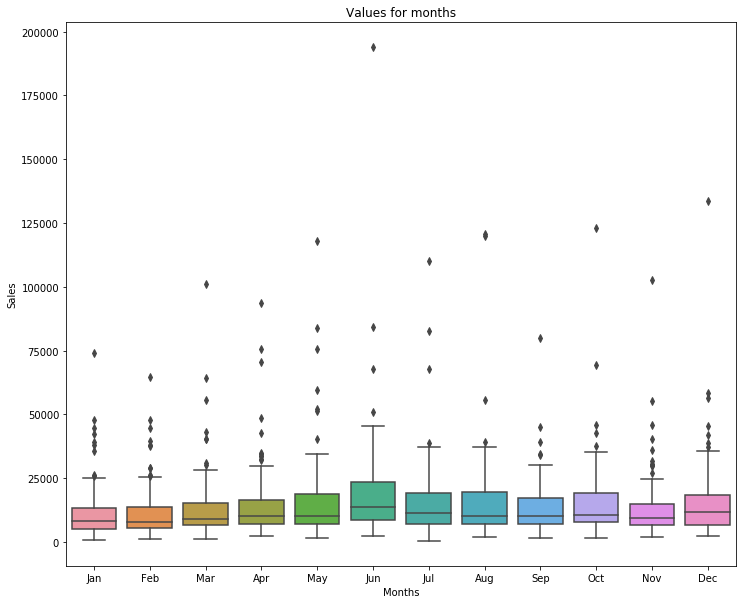

In [4]:
fig, ax = plt.subplots(figsize=(12,10))

sns.boxplot(reindexed_data.index.strftime("%b"), reindexed_data["Sales"], ax=ax)#, width=20)
#to make it more readable, we use the month's name instead of month number, see: 
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Period.strftime.html
plt.title("Values for months")
plt.xlabel("Months")
plt.show()

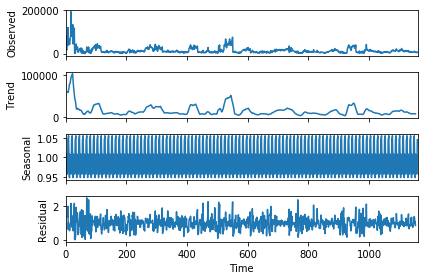

In [5]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.close()
#from statsmodels.tsa.seasonal 
analysis = seasonal_decompose(data["Sales"].values,model="multiplicative", freq=12)

analysis.plot()
plt.show()

# Model visualization

In [6]:
# !!! shuffle = False !!!
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(data, test_size=0.1, shuffle=False)

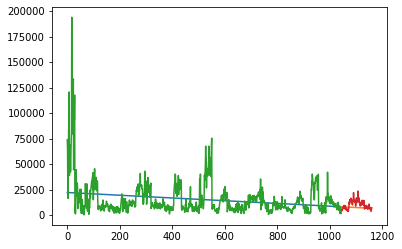

In [7]:
from sklearn import linear_model
lin_model= linear_model.LinearRegression()
lin_model.fit(train_data.index.astype("int64").values.reshape(-1, 1),train_data["Sales"].values)#

train_fit = lin_model.predict(train_data.index.astype("int64").values.reshape(-1, 1))
train_fit = pd.Series(train_fit)
train_fit.index =train_data.index

prediction = lin_model.predict(test_data.index.astype("int64").values.reshape(-1, 1))
prediction = pd.Series(prediction)
prediction.index =test_data.index


plt.plot(train_fit)
plt.plot(prediction)

plt.plot(train_data["Sales"])

plt.plot(test_data["Sales"])

plt.show()

In [8]:
from statsmodels.tsa.api import ExponentialSmoothing


history = [x for x in list(train_data["Sales"].values.astype("float"))]
predictions = list()

print("Prediction with ES method:\n")

# We iterate through the test set step by step
# Yes, test set. This can be undestood as an on-line learning scenario, for each datapoint 
for t in range(len(list(test_data["Sales"].values.astype("float")))):
    
    # Model inicialization
    model = ExponentialSmoothing(history)
    
    # Worth noting,that with seasonality, trend and additivity parameters well chosen
    # - since Statsmodels is quite clever - 
    # we could reach MUCH better results. This is only  anaive demonstration
    
    model_fit = model.fit(use_boxcox=True)
    # Predicting one step ahead
    output = model_fit.forecast(1)
    # colecting predictions
    yhat = output[0]
    predictions.append(yhat)
    
    #doing one step in time
    obs = list(test_data["Sales"].values.astype("float"))[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))


Prediction with ES method:

predicted=2685.663432, expected=4400.000000
predicted=3443.906292, expected=6000.000000
predicted=4550.036355, expected=4800.000000
predicted=4674.306410, expected=5600.000000
predicted=5119.839379, expected=5400.000000
predicted=5259.207667, expected=7800.000000
predicted=6412.048230, expected=8200.000000
predicted=7258.998449, expected=7600.000000
predicted=7429.271760, expected=7000.000000
predicted=7208.837853, expected=9000.000000
predicted=8061.912487, expected=9800.000000
predicted=8896.230278, expected=6800.000000
predicted=7763.407663, expected=6800.000000
predicted=7260.195777, expected=6400.000000
predicted=6811.638868, expected=7600.000000
predicted=7198.382150, expected=9400.000000
predicted=8232.633258, expected=5600.000000
predicted=6772.101984, expected=5800.000000
predicted=6262.112665, expected=7200.000000
predicted=6717.813606, expected=7000.000000
predicted=6858.462665, expected=5400.000000
predicted=6077.996373, expected=6000.000000
pred


Mean abs error: 1819.416760604547
Explained variance: 0.6796900767362556


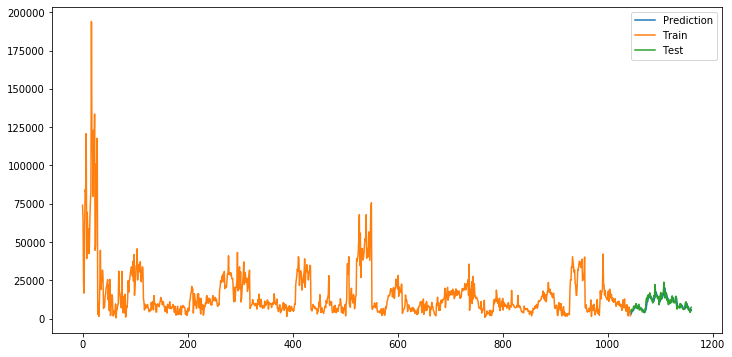

In [9]:
from sklearn.metrics import mean_absolute_error, explained_variance_score
    
errors = np.array(test_data["Sales"].values)-np.array(predictions)

print()
print("Mean abs error:",mean_absolute_error(test_data["Sales"].values,predictions))
print("Explained variance:",explained_variance_score(test_data["Sales"].values,predictions))

predictions = pd.Series(predictions)
predictions.index =test_data.index    

fig, ax = plt.subplots(figsize=(12,6))
plt.plot(predictions, label="Prediction")

plt.plot(train_data["Sales"], label="Train")

plt.plot(test_data["Sales"], label="Test")
plt.legend()
plt.show()

# Model for three month ahead for each code

In [10]:
data.head(100)

,Code,Month,Sales
0,WS_000060,2018 / 01,74000
1,WS_000060,2018 / 02,64600
2,WS_000060,2018 / 03,22800
3,WS_000060,2018 / 04,16600
4,WS_000060,2018 / 05,59400
5,WS_000060,2018 / 06,84200
6,WS_000060,2018 / 07,82600
7,WS_000060,2018 / 08,120800
8,WS_000060,2018 / 09,39200
9,WS_000060,2018 / 10,69400


In [11]:
j = 1
for i in range(0, 1159):
        data['Month'][i] = j
        j += 1
        if j > 12:
            j = 1
        if data['Code'][i] != data['Code'][i+1]:
            j = 1
            
data['Month'][1159] = 5       

C:\Users\Aspandiyar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aspandiyar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [12]:
##removing firhst two letters of the ID##
data['Code'] = data['Code'].str[3:]

In [13]:
data.iloc[:,0] = data.iloc[:,0].astype(str).astype(int)

In [14]:
data.iloc[:,1] = data.iloc[:,1].astype(str).astype(int)

In [15]:
data['Year'] = 0
j = 2018
for i in range(0, 1159):
        data['Year'][i] = j
        if data['Month'][i] == 12:
            j += 1
        if data['Code'][i] != data['Code'][i+1]:
            j = 2018
            
data['Year'][1159] = 2020      

C:\Users\Aspandiyar\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Aspandiyar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [16]:
data.dtypes

Code     int32
Month    int32
Sales    int64
Year     int64
dtype: object

In [17]:
X = data.drop('Sales', axis = 1)
Y = data['Sales']

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.20, random_state=13)

In [19]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(928, 3)
(928,)
(232, 3)
(232,)


In [20]:
Y_train_mean = Y_train.mean()
print("Y_train_mean =", Y_train_mean)

Y_train_meandev = sum((Y_train-Y_train_mean)**2)
print("Y_train_meandev =", Y_train_meandev)

Y_test_meandev = sum((Y_test-Y_train_mean)**2)
print("Y_test_meandev =", Y_test_meandev)


Y_train_mean = 15084.181034482759
Y_train_meandev = 252510722177.58627
Y_test_meandev = 32985852762.499985


In [21]:
#Random forest using cross validation
from sklearn.ensemble import RandomForestRegressor
RForregCV = RandomForestRegressor(random_state=0)
from sklearn.model_selection import GridSearchCV
param_grid = {
'max_depth': [10],
'n_estimators': [200]
}
CV_rfmodel = GridSearchCV(estimator=RForregCV,
param_grid=param_grid, cv=10)
CV_rfmodel.fit(X_train, Y_train)
print(CV_rfmodel.best_params_)
{'max_depth': 8.0, 'n_estimators': 150}
RForregCV = RForregCV.set_params(**CV_rfmodel.best_params_)
RForregCV.fit(X_train, Y_train)
Y_train_pred = RForregCV.predict(X_train)
Y_train_dev = sum((Y_train-Y_train_pred)**2)
r2 = 1 - Y_train_dev/Y_train_meandev
print("R2 =", r2)

Y_test_pred = RForregCV.predict(X_test)
Y_test_dev = sum((Y_test-Y_test_pred)**2)
pseudor2 = 1 - Y_test_dev/Y_test_meandev
print("Pseudo-R2 =", pseudor2)



{'max_depth': 10, 'n_estimators': 200}
R2 = 0.958353696660588
Pseudo-R2 = 0.8075713114489596


In [22]:
pred_rf = CV_rfmodel.predict(X)

In [23]:
predictions = pd.DataFrame({'Pred_rf': pred_rf})

In [24]:
all_data = pd.concat([data, predictions], axis = 1)

In [25]:
all_data

,Code,Month,Sales,Year,Pred_rf
0,60,1,74000,2018,52461.000000
1,60,2,64600,2018,54801.000000
2,60,3,22800,2018,36221.000000
3,60,4,16600,2018,37177.000000
4,60,5,59400,2018,71852.000000
5,60,6,84200,2018,91137.000000
6,60,7,82600,2018,83674.000000
7,60,8,120800,2018,102970.000000
8,60,9,39200,2018,56782.000000
9,60,10,69400,2018,66497.000000


In [26]:
list = [60, 54589, 53270, 52872, 49548, 48033, 46956, 46890, 46831,
       46784, 46764, 46750, 46740, 46723, 37041, 32322, 32172, 32105,
       32048, 32003, 31950, 22171, 22168, 22163, 22160, 22158, 22157,
       22156, 22155, 22154, 22152, 22150, 22149, 22147, 22143, 22142,
       22141, 22139, 22138, 22137]

In [27]:
def Insert_row_(row_number, df, row_value): 
    # Slice the upper half of the dataframe 
    df1 = df[0:row_number] 
   
    # Store the result of lower half of the dataframe 
    df2 = df[row_number:] 
   
    # Inser the row in the upper half dataframe 
    df1.loc[row_number]=row_value 
   
    # Concat the two dataframes 
    df_result = pd.concat([df1, df2]) 
   
    # Reassign the index labels 
    df_result.index = [*range(df_result.shape[0])] 
   
    # Return the updated dataframe 
    return df_result 

In [28]:
j = 0
for i in range(1,41):
    data = Insert_row_(29*i+j, data, [list[i-1],6,0, 2020]) 
    j = j+1
    data = Insert_row_(29*i+j, data, [list[i-1],7,0, 2020])  
    j = j+1
    data = Insert_row_(29*i+j, data, [list[i-1],8,0, 2020])  
    j = j+1

C:\Users\Aspandiyar\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [29]:
predict = data.loc[data['Sales']==0]
predict = predict.reset_index(drop=True)

In [30]:
X_test = predict
X_test.drop(['Sales'], axis=1, inplace = True)

In [31]:
X_p = X_test.iloc[:,:].values

In [32]:
Y_p = CV_rfmodel.predict(X_p)

In [33]:
predict['Sales'] = pd.Series(Y_p)

In [34]:
predict

,Code,Month,Year,Sales
0,60,6,2020,156363.000000
1,60,7,2020,124164.000000
2,60,8,2020,119051.000000
3,54589,6,2020,23943.727948
4,54589,7,2020,20000.821996
5,54589,8,2020,20001.609450
6,53270,6,2020,18519.461062
7,53270,7,2020,12312.262848
8,53270,8,2020,10125.442330
9,52872,6,2020,38690.193481


In [35]:
predict['Date'] = pd.to_datetime(predict[['Year', 'Month']].assign(DAY=1))

In [36]:
data['Date'] = pd.to_datetime(data[['Year', 'Month']].assign(DAY=1))

In [37]:
df = pd.concat([data, predict]).sort_values(['Code', 'Date']).reset_index(drop=True)
df = df[(df != 0).all(1)]


C:\Users\Aspandiyar\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [38]:
df

,Code,Date,Month,Sales,Year
0,60,2018-01-01,1,74000.000000,2018
1,60,2018-02-01,2,64600.000000,2018
2,60,2018-03-01,3,22800.000000,2018
3,60,2018-04-01,4,16600.000000,2018
4,60,2018-05-01,5,59400.000000,2018
5,60,2018-06-01,6,84200.000000,2018
6,60,2018-07-01,7,82600.000000,2018
7,60,2018-08-01,8,120800.000000,2018
8,60,2018-09-01,9,39200.000000,2018
9,60,2018-10-01,10,69400.000000,2018


In [39]:
 data_ori = pd.read_csv(r'C:/Users/Aspandiyar/Desktop/KPMG/Sales20182020.csv', delimiter = ",")

In [40]:
data_ori.Code.unique()

array(['WS_000060', 'RT_054589', 'RT_053270', 'RT_052872', 'RT_049548',
       'RT_048033', 'RT_046956', 'RT_046890', 'RT_046831', 'RT_046784',
       'RT_046764', 'RT_046750', 'RT_046740', 'RT_046723', 'RT_037041',
       'RT_032322', 'RT_032172', 'RT_032105', 'RT_032048', 'RT_032003',
       'RT_031950', 'RT_022171', 'RT_022168', 'RT_022163', 'RT_022160',
       'RT_022158', 'RT_022157', 'RT_022156', 'RT_022155', 'RT_022154',
       'RT_022152', 'RT_022150', 'RT_022149', 'RT_022147', 'RT_022143',
       'RT_022142', 'RT_022141', 'RT_022139', 'RT_022138', 'RT_022137'],
      dtype=object)

In [41]:
unique_list = ['WS_000060', 'RT_054589', 'RT_053270', 'RT_052872', 'RT_049548',
       'RT_048033', 'RT_046956', 'RT_046890', 'RT_046831', 'RT_046784',
       'RT_046764', 'RT_046750', 'RT_046740', 'RT_046723', 'RT_037041',
       'RT_032322', 'RT_032172', 'RT_032105', 'RT_032048', 'RT_032003',
       'RT_031950', 'RT_022171', 'RT_022168', 'RT_022163', 'RT_022160',
       'RT_022158', 'RT_022157', 'RT_022156', 'RT_022155', 'RT_022154',
       'RT_022152', 'RT_022150', 'RT_022149', 'RT_022147', 'RT_022143',
       'RT_022142', 'RT_022141', 'RT_022139', 'RT_022138', 'RT_022137']

In [42]:
j = 1
for i in range(0, 1159):
        data_ori['Month'][i] = j
        j += 1
        if j > 12:
            j = 1
        if data_ori['Code'][i] != data_ori['Code'][i+1]:
            j = 1
            
data_ori['Month'][1159] = 5       

C:\Users\Aspandiyar\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Aspandiyar\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [43]:
j = 0
for i in range(1,41):
    data_ori = Insert_row_(29*i+j, data_ori, [unique_list[i-1],6,0]) 
    j = j+1
    data_ori = Insert_row_(29*i+j, data_ori, [unique_list[i-1],7,0])  
    j = j+1
    data_ori = Insert_row_(29*i+j, data_ori, [unique_list[i-1],8,0])  
    j = j+1

C:\Users\Aspandiyar\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [44]:
data_ori

,Code,Month,Sales
0,WS_000060,1,74000
1,WS_000060,2,64600
2,WS_000060,3,22800
3,WS_000060,4,16600
4,WS_000060,5,59400
5,WS_000060,6,84200
6,WS_000060,7,82600
7,WS_000060,8,120800
8,WS_000060,9,39200
9,WS_000060,10,69400


In [45]:
df.Code = data_ori.Code

In [46]:
df.to_csv (r'C:/Users/Aspandiyar/Desktop/KPMG/Code_predictions.csv', index = False, header=True)

In [47]:
company = df

In [48]:
company = company.groupby(['Month', 'Year']).agg({'Date':'first', 'Sales':'sum'}).reset_index()

In [49]:
company = company.sort_values(['Date']).reset_index(drop=True)

In [50]:
company

,Month,Year,Date,Sales
0,1,2018,2018-01-01,488800.000000
1,2,2018,2018-02-01,477600.000000
2,3,2018,2018-03-01,492800.000000
3,4,2018,2018-04-01,520600.000000
4,5,2018,2018-05-01,607800.000000
5,6,2018,2018-06-01,793100.000000
6,7,2018,2018-07-01,625000.000000
7,8,2018,2018-08-01,700000.000000
8,9,2018,2018-09-01,533400.000000
9,10,2018,2018-10-01,657400.000000


In [51]:
company.to_csv (r'C:/Users/Aspandiyar/Desktop/KPMG/Whole_company_predictions.csv', index = False, header=True)

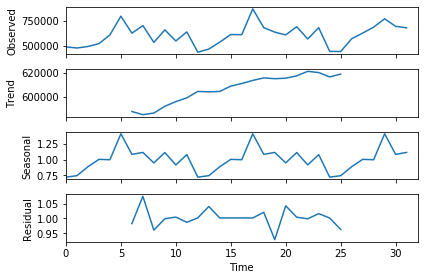

In [52]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.close()
#from statsmodels.tsa.seasonal 
analysis = seasonal_decompose(company["Sales"].values,model="multiplicative", freq=12)

analysis.plot()
plt.show()